In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

from sklearn.metrics import r2_score

## Training Data

In [ ]:
# @title Default title text
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
traindata

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


# Visualization Correlation

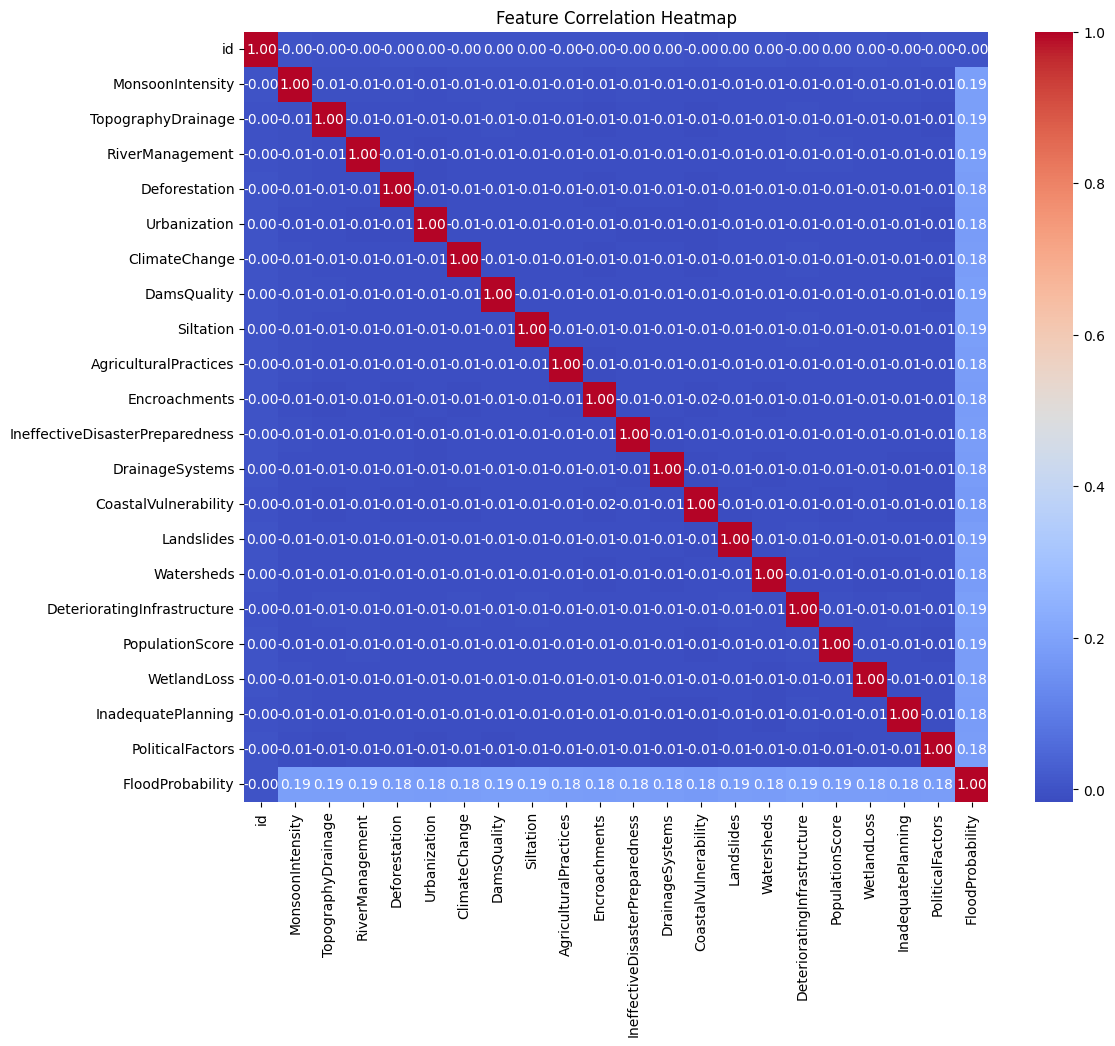

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(traindata.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

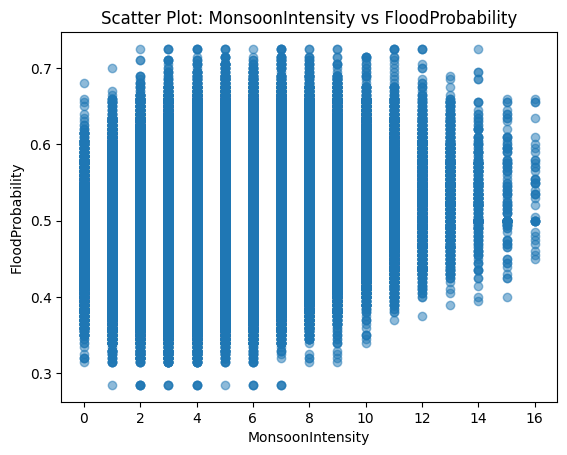

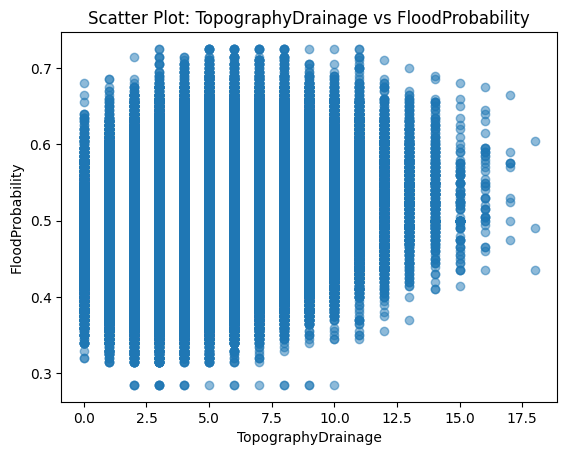

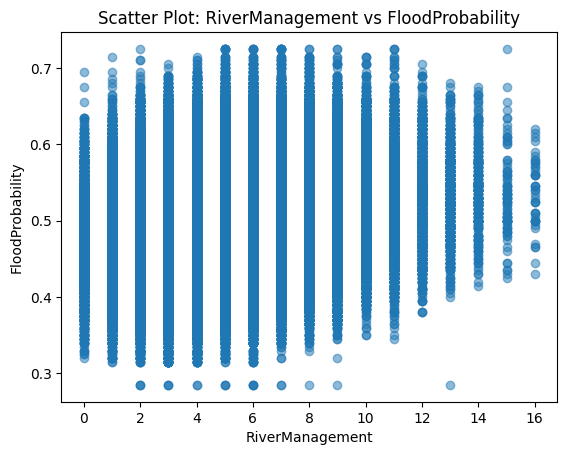

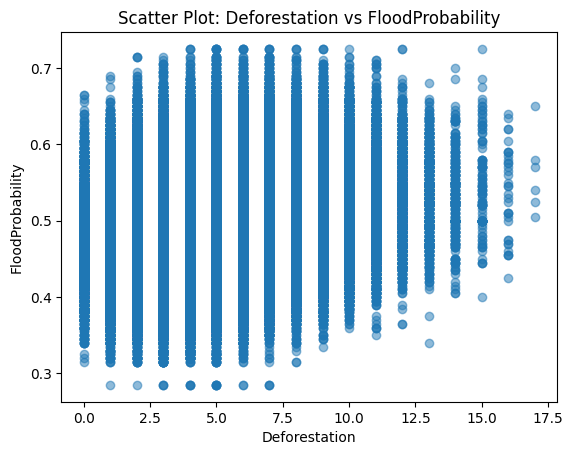

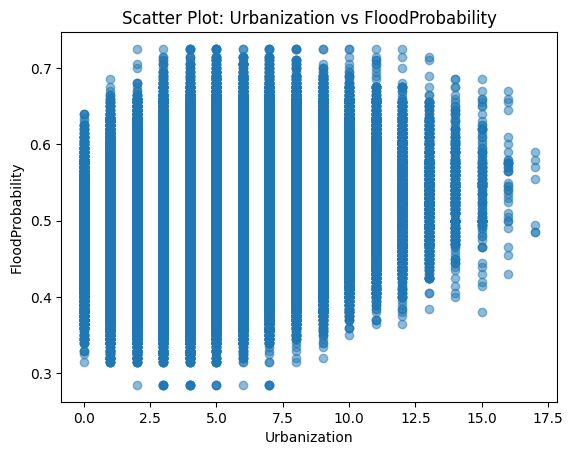

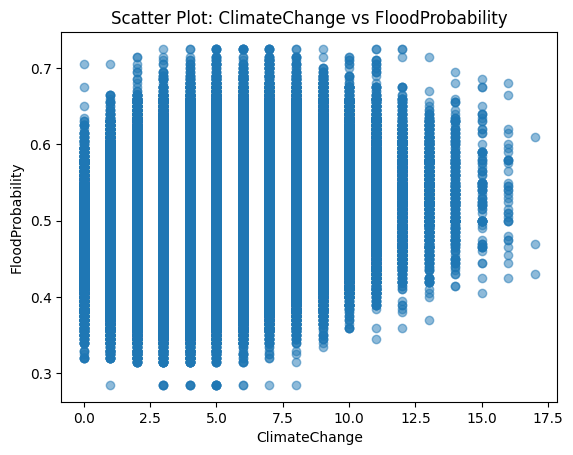

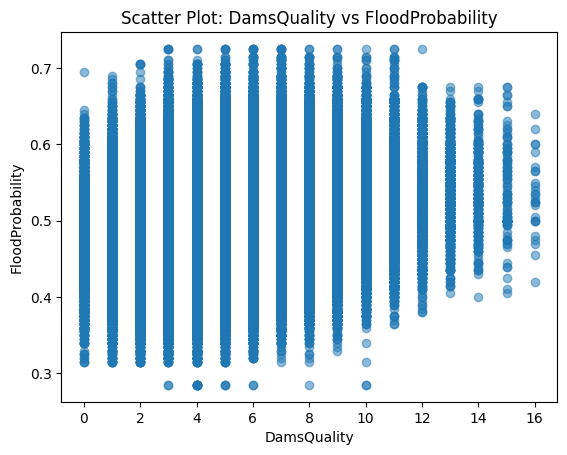

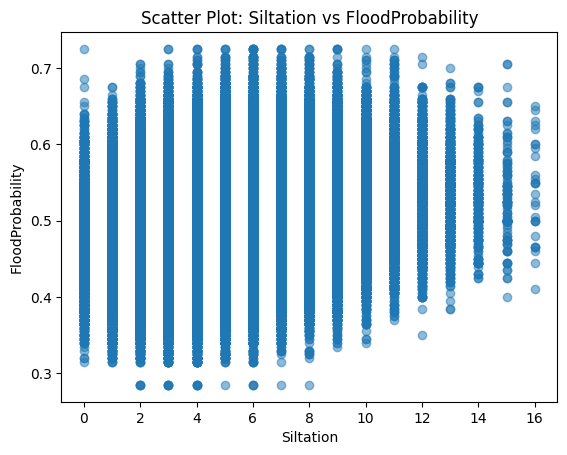

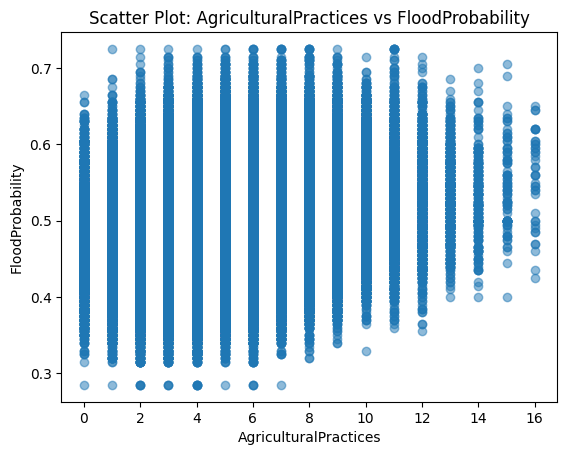

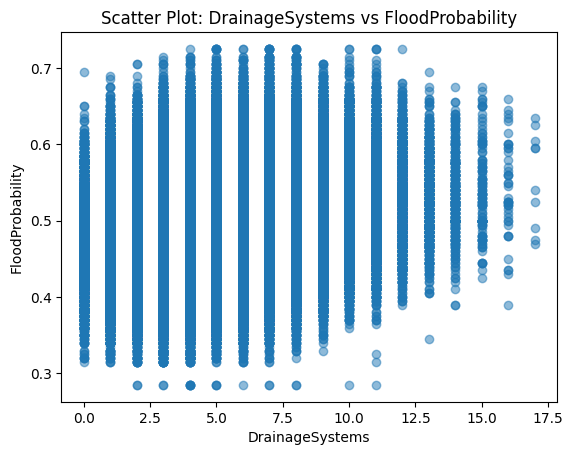

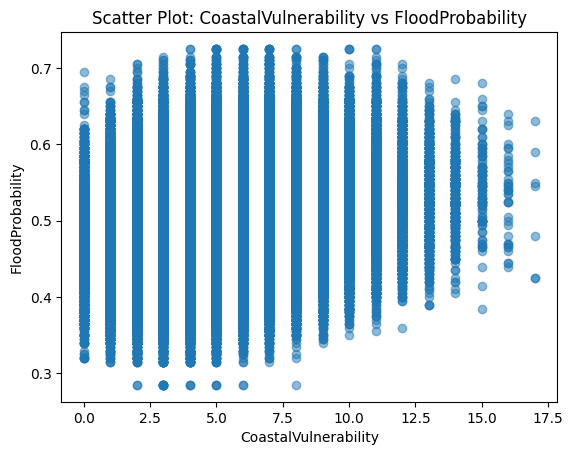

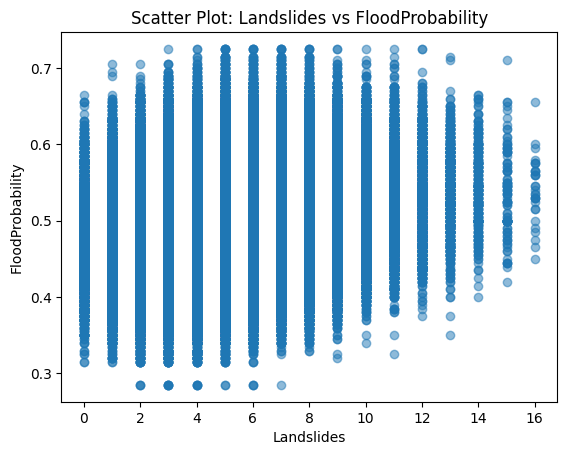

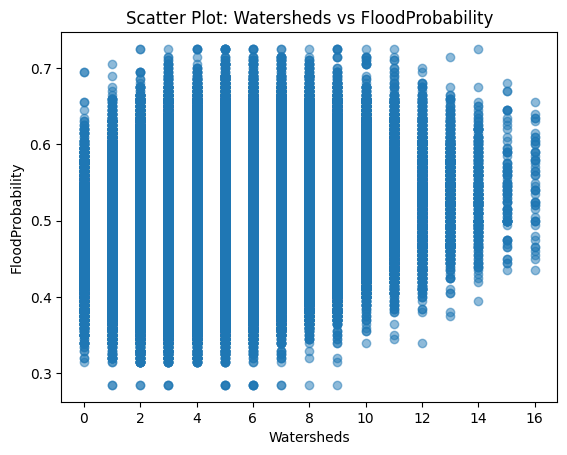

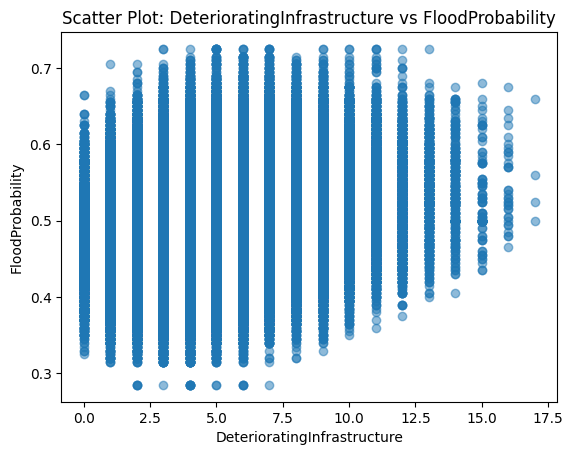

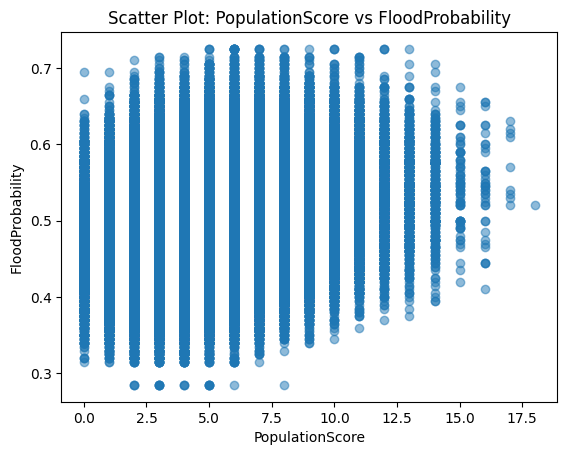

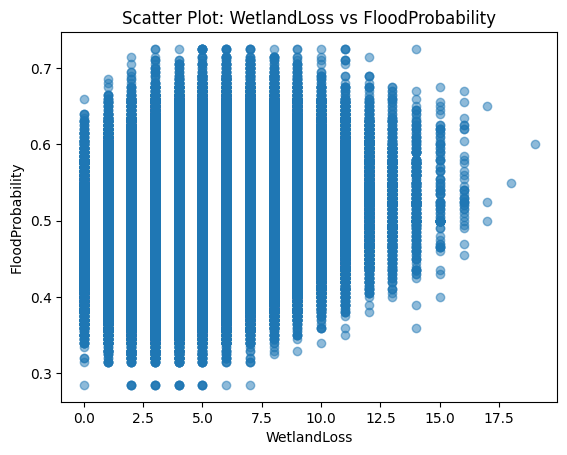

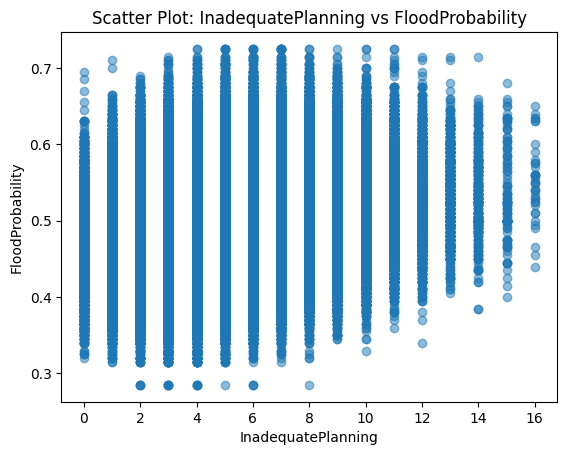

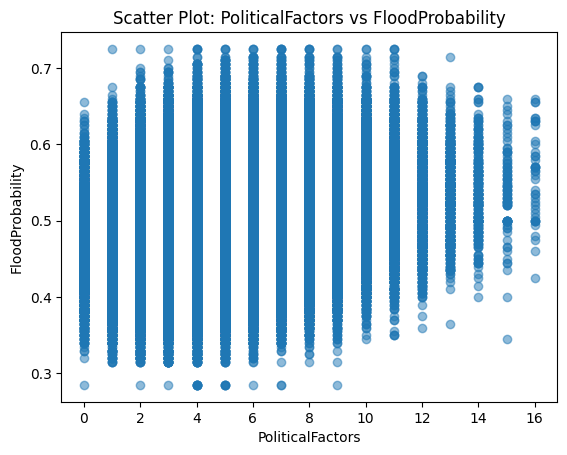

In [ ]:
import matplotlib.pyplot as plt

features = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
    'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
    'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds',
    'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning',
    'PoliticalFactors'
]

for feature in features:
    plt.scatter(
        traindata[feature],
        traindata['FloodProbability'],
        alpha=0.5
    )
    plt.xlabel(feature)
    plt.ylabel('FloodProbability')
    plt.title(f'Scatter Plot: {feature} vs FloodProbability')
    plt.show()


# Specific Visualizations
```txt
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
    'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
    'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds',
    'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning',
    'PoliticalFactors'
```

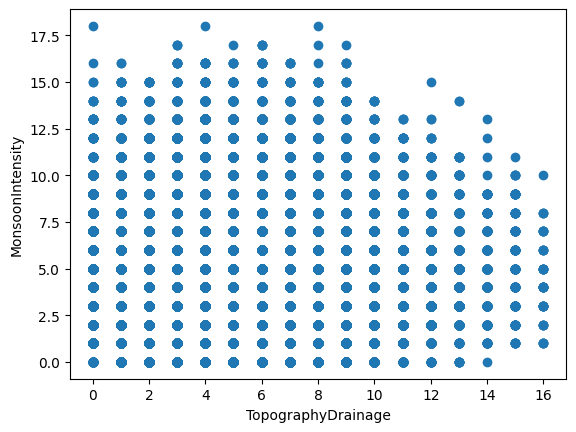

In [42]:
plt.scatter(traindata['MonsoonIntensity'], traindata['TopographyDrainage'])

plt.ylabel('MonsoonIntensity')
plt.xlabel('TopographyDrainage')
plt.show()

# Testing All Data - Building Regression Models

In [ ]:
X = traindata.drop(columns=['FloodProbability'])

y = traindata['FloodProbability']

In [ ]:
mlr_model = LinearRegression()

mlr_model.fit(X,y)

y_pred = mlr_model.predict(X)

print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: -0.053319957101101045
Coefficients: [3.72340691e-11 5.61158655e-03 5.64756604e-03 5.66643395e-03
 5.67914809e-03 5.65771902e-03 5.66253271e-03 5.65494179e-03
 5.63783205e-03 5.63522206e-03 5.64989379e-03 5.64040011e-03
 5.63555688e-03 5.67089123e-03 5.64162158e-03 5.64650243e-03
 5.61563220e-03 5.67749747e-03 5.63493529e-03 5.60869392e-03
 5.64939858e-03]


In [ ]:
olsmod = sm.OLS(y,X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       FloodProbability   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          3.229e+07
Date:                Fri, 05 Sep 2025   Prob (F-statistic):                        0.00
Time:                        04:55:10   Log-Likelihood:                      2.7556e+06
No. Observations:             1117957   AIC:                                 -5.511e+06
Df Residuals:                 1117936   BIC:                                 -5.511e+06
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
id                              -1.936e-09   5.97e-11    -32.450      0.000   -2.05e-09   -1.82e-09
MonsoonIntensity                    0.0051    9.2e-06    554.412      0.000       0.005       0.005
TopographyDrainage                  0.0051   9.03e-06    568.893      0.000       0.005       0.005
RiverManagement                     0.0051   9.12e-06    564.359      0.000       0.005       0.005
Deforestation                       0.0051    9.2e-06    559.305      0.000       0.005       0.005
Urbanization                        0.0051   9.06e-06    566.022      0.000       0.005       0.005
ClimateChange                       0.0051   9.18e-06    559.485      0.000       0.005       0.005
DamsQuality                         0.0051   9.07e-06    566.473      0.000       0.005       0.005
Siltation                           0.0051   9.15e-06    559.629      0.000       0.005       0.005
AgriculturalPractices               0.0051   9.13e-06    559.619      0.000       0.005       0.005
Encroachments                       0.0051   9.05e-06    564.892      0.000       0.005       0.005
IneffectiveDisasterPreparedness     0.0051   9.09e-06    562.926      0.000       0.005       0.005
DrainageSystems                     0.0051    9.1e-06    560.243      0.000       0.005       0.005
CoastalVulnerability                0.0051   9.02e-06    568.577      0.000       0.005       0.005
Landslides                          0.0051   9.09e-06    563.438      0.000       0.005       0.005
Watersheds                          0.0051   9.07e-06    564.718      0.000       0.005       0.005
DeterioratingInfrastructure         0.0051   9.16e-06    557.375      0.000       0.005       0.005
PopulationScore                     0.0052   9.11e-06    566.057      0.000       0.005       0.005
WetlandLoss                         0.0051   9.13e-06    559.618      0.000       0.005       0.005
InadequatePlanning                  0.0051   9.07e-06    560.189      0.000       0.005       0.005
PoliticalFactors                    0.0051   9.03e-06    567.382      0.000       0.005       0.005
==============================================================================
Omnibus:                    42985.852   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51789.709
Skew:                           0.446   Prob(JB):                         0.00
Kurtosis:                       3.563   Cond. No.                     3.13e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Sta

In [ ]:
print(olsmod.rsquared)

0.998353818181089


### Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

In [ ]:
X_test = testdata

y_pred_test = mlr_model.predict(X_test)

submission = pd.DataFrame({'FloodProbability': y_pred_test})
print(submission.head())

   FloodProbability
0          0.573636
1          0.455264
2          0.454763
3          0.466225
4          0.466088


# Experiment 1


In [ ]:
X_train_new = traindata.drop(columns=['FloodProbability', 'Urbanization', 'DamsQuality'])
y_train = traindata['FloodProbability']

mlr_model_new = LinearRegression()
mlr_model_new.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
X_test_new = testdata.drop(columns=['Urbanization', 'DamsQuality'])
y_pred_new = mlr_model_new.predict(X_test_new)

submission = pd.DataFrame({'FloodProbability': y_pred_test})
print(submission.head())

   FloodProbability
0          0.573636
1          0.455264
2          0.454763
3          0.466225
4          0.466088


# Experiment 2 - trying to find top features that matter for this problem

In [43]:
corr_with_target = traindata.corr()['FloodProbability'].sort_values(ascending=False)
print(corr_with_target)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
id                                -0.000184
Name: FloodProbability, dtype: f

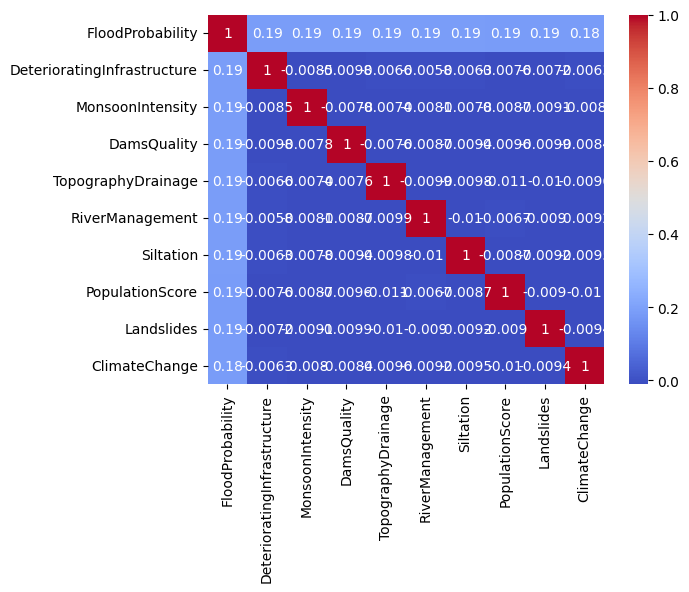

In [48]:
# visualizing top features
top_features = corr_with_target.abs().sort_values(ascending=False).head(10).index
sns.heatmap(traindata[top_features].corr(), annot=True, cmap='coolwarm')
plt.show()

### choosing top 10 features for the model

In [69]:
top_features = [
    'DeterioratingInfrastructure',
    'MonsoonIntensity',
    'DamsQuality',
    'TopographyDrainage',
    'RiverManagement',
    'Siltation',
    'PopulationScore',
    'Landslides',
    'ClimateChange',
    'Deforestation'
]

# Training data
X_train_new = traindata[top_features]
y_train = traindata['FloodProbability']

# Train model
mlr_model_new_top10 = LinearRegression()
mlr_model_new_top10.fit(X_train_new, y_train)

# Test data — only predictors
X_test_new = testdata[top_features]
y_pred_new = mlr_model_new.predict(X_test_new)

# Submission
submission = pd.DataFrame({'FloodProbability': y_pred_new})
print(submission.head())


   FloodProbability
0          0.527628
1          0.492672
2          0.442568
3          0.477554
4          0.502872


In [70]:
y_train_pred = mlr_model_new_top10.predict(X_train_new)
r2 = r2_score(y_train, y_train_pred)
print(f"r^2: {r2:.6f}")

r^2: 0.379043


### choosing top 5 features for the model

In [82]:
top_features = [
    'DeterioratingInfrastructure',
    'MonsoonIntensity',
    'DamsQuality',
    'TopographyDrainage',
    'RiverManagement'
]

# Training data
X_train_new = traindata[top_features]
y_train = traindata['FloodProbability']

# Train model
mlr_model_new_top5 = LinearRegression()
mlr_model_new_top5.fit(X_train_new, y_train)

# Test data — only predictors
X_test_new = testdata[top_features]
y_pred_new = mlr_model_new_top5.predict(X_test_new)

# Submission
submission = pd.DataFrame({'FloodProbability': y_pred_new})
print(submission.head())


   FloodProbability
0          0.500952
1          0.457990
2          0.462631
3          0.482044
4          0.491942


In [83]:
y_train_pred = mlr_model_new_top5.predict(X_train_new)
r2 = r2_score(y_train, y_train_pred)
print(f"r^2: {r2:.6f}")

r^2: 0.183310


the rSquared -> is shrinking

In [84]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

id = samplefile.pop('id')
# y_pred = mlr_model_new_top5.predict(testdata)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
